<a href="https://colab.research.google.com/github/akemitti/ciencia-de-dados/blob/main/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Validação Cruzada e Análise de Desempenho

*Isabella Farabotti (10409153) e Rodrigo Pampolin (10409775)*

In [13]:
import pandas as pd
from google.colab import files
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Fazendo o upload da base

In [14]:
# Carregar a aba "Base_filmes" em um DataFrame
uploaded = files.upload()

df = pd.read_excel('Base_Filmes.xlsx')

# Exibir as primeiras linhas do DataFrame para inspecionar a estrutura e os dados
df.head()

Saving Base_Filmes.xlsx to Base_Filmes (1).xlsx


,Indice,Ano de lançamento,Duração do filme em minutos,Classificação do usuário do IMDb.,Número de votos no IMDb.,Classificação do Metascore.,Renda bruta do filme.,Certificação
0,0,1994,142,9.3,2804443,82.0,28340000.0,R
1,1,1972,175,9.2,1954174,100.0,134970000.0,R
2,4,2008,152,9.0,2786129,84.0,534860000.0,PG-13
3,5,1993,195,9.0,1409869,95.0,96900000.0,R
4,6,2003,201,9.0,1919908,94.0,377850000.0,PG-13


In [15]:
# Numero de linhas e colunas do DataFrame
df.shape

(6465, 8)

## Iniciando o tratamento da base

In [16]:
# Remove espaços em branco no início ou final dos nomes das colunas para evitar problemas de acesso
df.columns = df.columns.str.strip()

# Criar a variável alvo 'sucesso' (1 para IMDb >= 8.0, 0 caso contrário)
df['sucesso'] = np.where(df['Classificação do usuário do IMDb.'] >= 8.0, 1, 0)

# Preenchemos os valores ausentes com 0 para simplificar.
df

features = df[['Ano de lançamento',
               'Duração do filme em minutos',
               'Número de votos no IMDb.',
               'Classificação do Metascore.',
               'Renda bruta do filme.']].fillna(0)

df

,Indice,Ano de lançamento,Duração do filme em minutos,Classificação do usuário do IMDb.,Número de votos no IMDb.,Classificação do Metascore.,Renda bruta do filme.,Certificação,sucesso
0,0,1994,142,9.3,2804443,82.0,2.834000e+07,R,1
1,1,1972,175,9.2,1954174,100.0,1.349700e+08,R,1
2,4,2008,152,9.0,2786129,84.0,5.348600e+08,PG-13,1
3,5,1993,195,9.0,1409869,95.0,9.690000e+07,R,1
4,6,2003,201,9.0,1919908,94.0,3.778500e+08,PG-13,1
...,...,...,...,...,...,...,...,...,...
6460,9986,2010,99,4.9,14472,38.0,1.000000e+04,R,0
6461,9987,1998,114,4.9,20662,41.0,1.207000e+07,PG,0
6462,9988,2012,114,4.9,11205,42.0,6.565000e+15,PG-13,0
6463,9989,2017,91,4.9,13449,50.0,1.000000e+04,Not Rated,0


## Transformando coluna 'Certificação' em código para que o modelo consiga ler o valor

In [17]:
# Usamos o LabelEncoder para atribuir um número para cada categoria.
label_encoder = LabelEncoder()
df['Certificação'] = df['Certificação'].astype(str)  # Garante que os dados sejam do tipo string
df['Certificação_cod'] = label_encoder.fit_transform(df['Certificação'])

# Adiciona a coluna codificada como mais uma feature para o modelo
features['Certificação_cod'] = df['Certificação_cod']

## Definição do modelo

In [18]:
# Definição da variável alvo para o modelo
target = df['sucesso']

# Definição dos modelos a serem comparados
# Modelo 1: Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42)

# Modelo 2: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)

# Configuração da validação cruzada com k-pastas (neste caso, k=5)
kpastas = KFold(n_splits=5, shuffle=True, random_state=42)

# Avaliação dos modelos usando a métrica de acurácia com cross validation
dt_scores = cross_val_score(decision_tree, features, target, cv=kpastas, scoring='accuracy')
knn_scores = cross_val_score(knn, features, target, cv=kpastas, scoring='accuracy')

print("Acurácia média da Árvore de Decisão:", np.mean(dt_scores))
print("Acurácia média do KNN:", np.mean(knn_scores))

Acurácia média da Árvore de Decisão: 0.954215003866976
Acurácia média do KNN: 0.9488012374323279


## Implementação da solução de feature_importances para a Árvore de Decisão

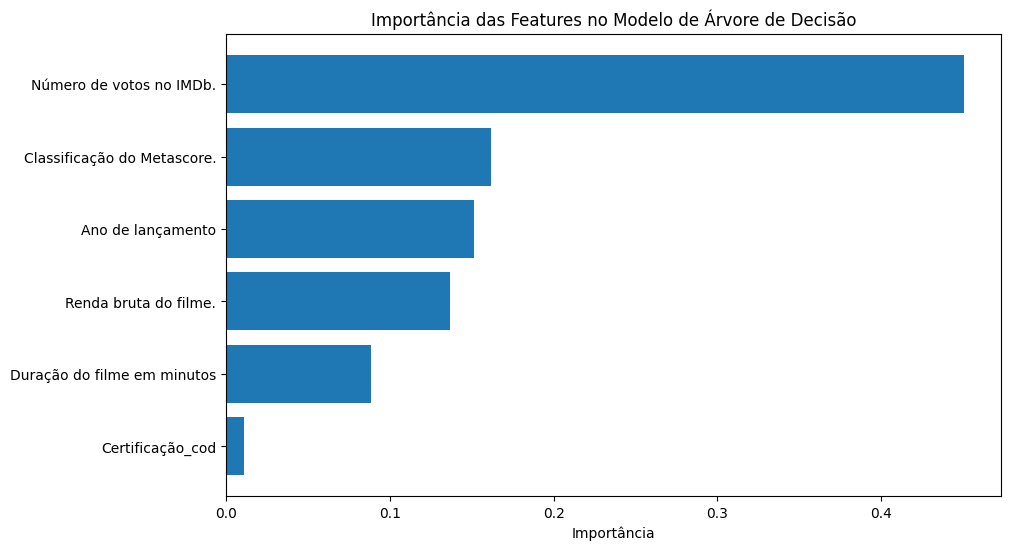

In [19]:
# Treina o modelo de Árvore de Decisão com os dados completos
decision_tree.fit(features, target)

# Calcula a importância de cada feature
importances = decision_tree.feature_importances_

# Ordena os índices das importâncias de forma crescente
sorted_idx = np.argsort(importances)

# Plot da importância das features
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features.columns[sorted_idx])
plt.xlabel('Importância')
plt.title('Importância das Features no Modelo de Árvore de Decisão')
plt.show()

In [20]:
# Exibição dos resultados médios de acurácia para cada modelo
results = pd.DataFrame({
    'Modelo': ['Árvore de Decisão', 'KNN'],
    'Acurácia Média': [np.mean(dt_scores), np.mean(knn_scores)]
})
print("Comparação de Desempenho (Acurácia Média):")
print(results)

Comparação de Desempenho (Acurácia Média):
              Modelo  Acurácia Média
0  Árvore de Decisão        0.954215
1                KNN        0.948801


## Implementando métodos gráficos de visualização dos dados


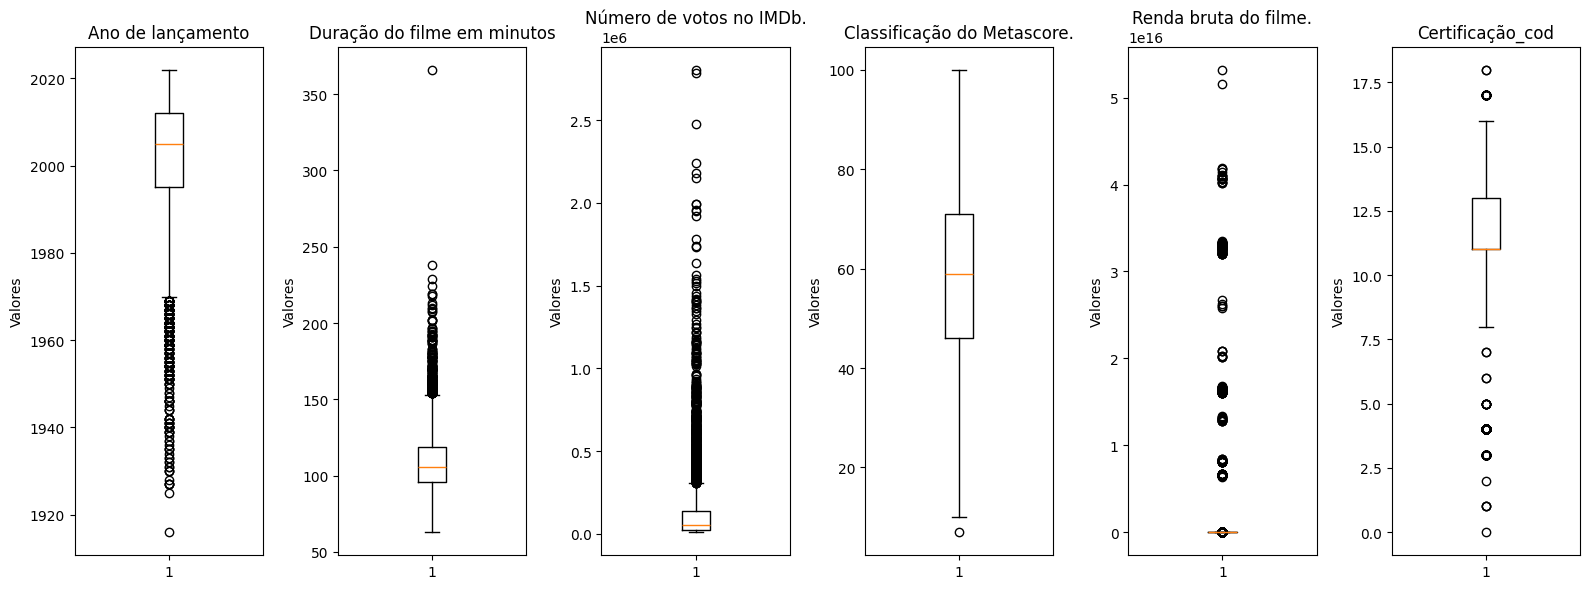

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=len(features.columns), figsize=(16, 6))

for i, col in enumerate(features.columns):
    axs[i].boxplot(features[col])
    axs[i].set_title(col)
    axs[i].set_ylabel("Valores")

plt.tight_layout()
plt.show()

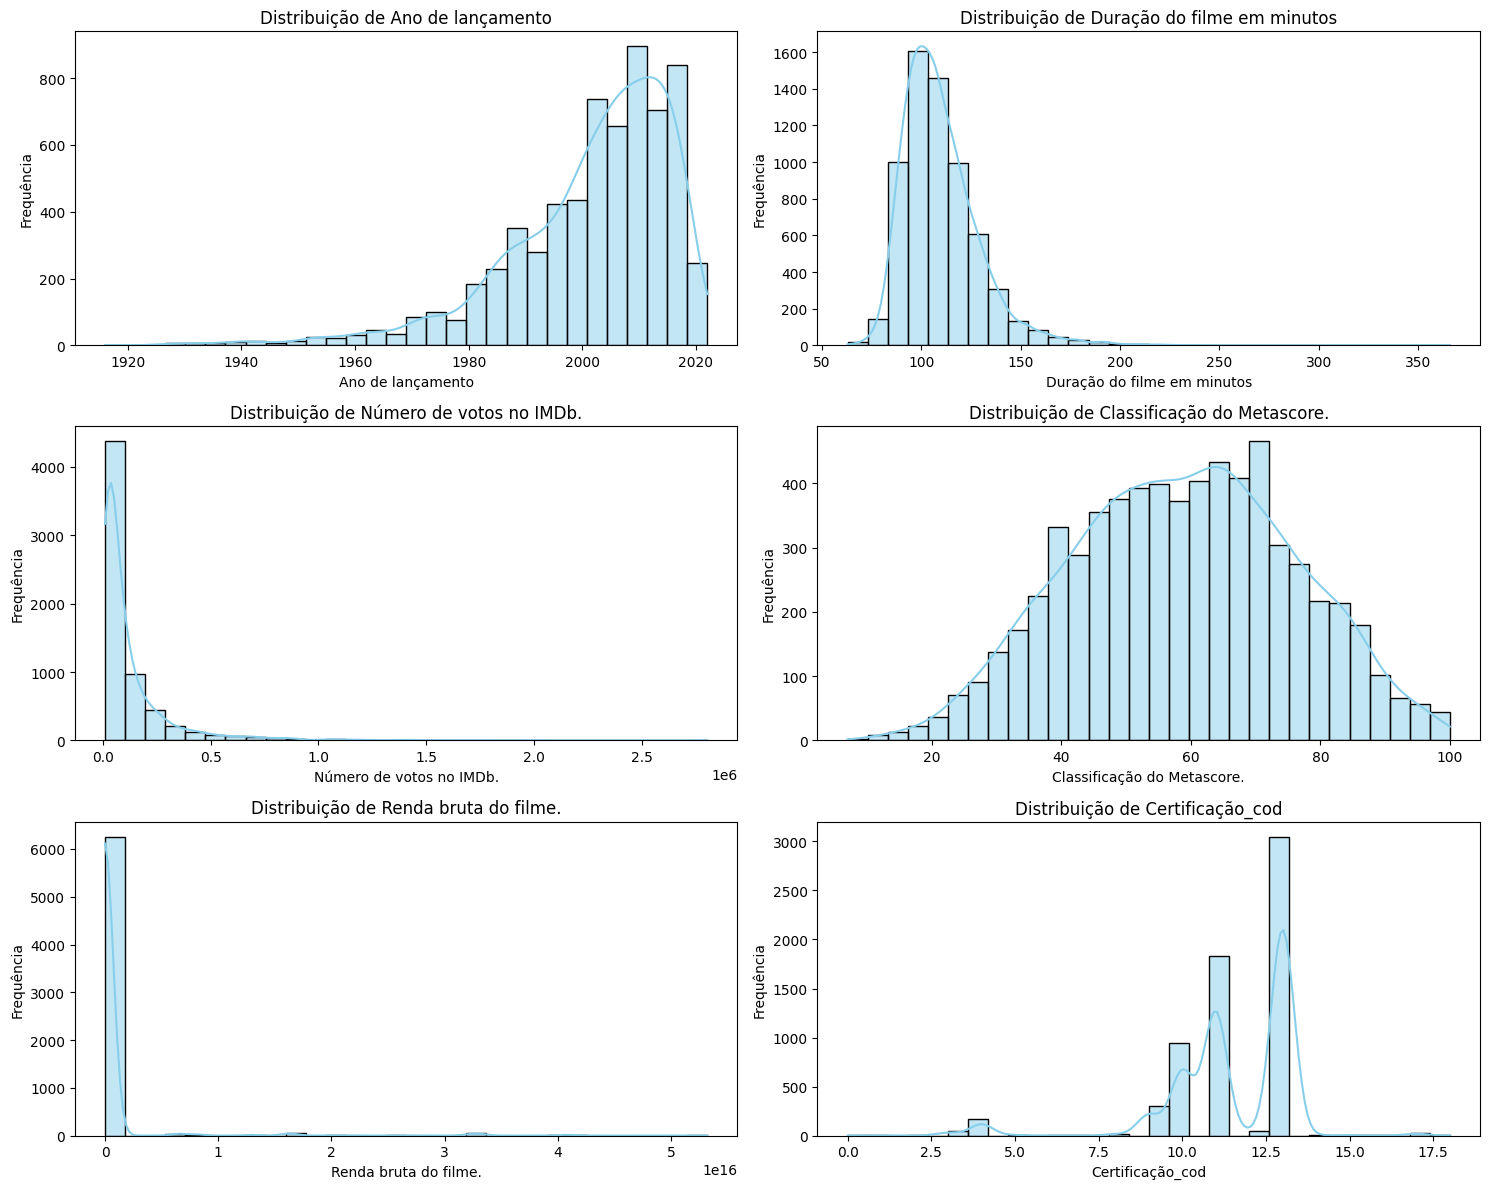

In [22]:
# Lista de colunas numéricas relevantes para o projeto
num_cols = ['Ano de lançamento',
            'Duração do filme em minutos',
            'Número de votos no IMDb.',
            'Classificação do Metascore.',
            'Renda bruta do filme.']

# Define o tamanho da figura para acomodar os histogramas
plt.figure(figsize=(15, 12))

# Cria um histograma para cada coluna
for i, col in enumerate(features.columns):
    plt.subplot(3, 2, i+1)
    sns.histplot(features[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

## Estatísticas Descritivas: média, mediana, desvio *padrão*

*count:* número de valores não nulos.

*mean:* média dos valores.

*std:* desvio padrão.

*min:* valor mínimo.

*max:* valor máximo.

In [26]:
import pandas as pd

# Gera as estatísticas descritivas (count, mean, std, min, 25%, 50%, 75%, max)
desc_stats = features.describe().T

# Adiciona a mediana como uma coluna (embora o 50% já seja a mediana, essa etapa é opcional)
desc_stats['median'] = features.median()

# Opcional: reorganizar as colunas para exibir a mediana logo após a média
desc_stats = desc_stats[['count', 'mean', 'median', 'std', 'min', 'max']]

# Exibe a tabela
display(desc_stats)



,count,mean,median,std,min,max
Ano de lançamento,6465.0,2.001534e+03,2005.0,1.473359e+01,1916.0,2.022000e+03
Duração do filme em minutos,6465.0,1.097305e+02,106.0,1.932304e+01,63.0,3.660000e+02
Número de votos no IMDb.,6465.0,1.260081e+05,55572.0,2.037511e+05,10014.0,2.804443e+06
Classificação do Metascore.,6465.0,5.872282e+01,59.0,1.716222e+01,7.0,1.000000e+02
Renda bruta do filme.,6465.0,6.490375e+14,21160000.0,4.189426e+15,0.0,5.321800e+16
Certificação_cod,6465.0,1.148415e+01,11.0,2.010285e+00,0.0,1.800000e+01
